### Unzip the Dataset

In [11]:
!unzip vehicles.csv.zip

Archive:  vehicles.csv.zip
  inflating: vehicles.csv            


In [1]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import TwoByTwoLayout
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
import matplotlib.pyplot as plt
from IPython.core.display import HTML

import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('vehicles.csv')
df.dropna(inplace=True)
rec_dataset = df[['condition', 'odometer', 'title_status', 'manufacturer', 'model', 'price', 'year', 'image_url']]
# drop empty entry
rec_dataset.dropna(inplace=True)

<ipython-input-56-79702ec7ae5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_dataset.dropna(inplace=True)


In [4]:
def cars_in_price_range(cars_dt, lower_bound, upper_bound,  num_of_sel=5, importance=None):
    '''
    given an input price range, return the list of cars with info of condition, odometer, title_status, manufacture and model, [optional] image_url, description
    param:
    @ lower_bound: lower bound of the price
    @ upper_bound: upper bound of the price
    @ num_of_sel: how many number of cars to display at the end (default=5)
    @ cars_dt: full car dataset
    @ importance: the importance score for quantifiable factors (in a dictionary) [sum is 1]
    return:
    @ list of cars in pandas dataframe with information of the cars
    '''
    scores = list()
    sub_set = cars_dt.query('@lower_bound <= price <= @upper_bound') # get all the cars within the proice range
    for index, row in sub_set.iterrows():
        scores.append( decide_value_of_cars(row,importance) )
    sub_set['score'] = scores # add the scores to the dataframe under 'score' column
    sub_set.sort_values(by='score',ascending = False, inplace=True) # Sort by scores, tops scores at the beggining
    sub_set = sub_set.head(num_of_sel) # get the first num_of_sel rows
    return sub_set

In [5]:
def decide_value_of_cars(carInfo, importance):
    '''
    given a car info, return the importance score
    param:
    @ carInfo: all the information of the cars including condition, odometer, title_status, manufacture and model
    @ score: the score by weighting different factors
    
    :type carInfo: car object 
    :type importance: float percentage, score based from 0-100 
    '''
    # so to calculate the importance score, I want to measure that off of 'condition' 'odometer' and 'title_status'
    # 'manufacturer', 'model', and 'year' are just details of the car 
    
    condition = carInfo.condition # (new, excellent, like new, good, fair, salvage) :type: string
    if condition is None:
        condition = 'unspecified'
    else:
        condition = condition.strip()
        
    mileage = carInfo.odometer # :type: float
    if mileage is None:
        mileage = 'unspecified'
        
    title_status = carInfo.title_status # (clean, rebuilt, salvage, lien, parts only, missing) :typt: string
    if title_status is None:
        title_status = 'unspecified'
    else:
        title_status = title_status.strip()
        
    year = carInfo.year # :type: float 
    if year is None:
        year = 'unspecified'
    
    # lets weigh these values 
    if (importance == 'condition'):
        weights_dict = {
        'condition':0.5,
        'odometer':0.16666667,
        'title_status':0.16666667,
        'year':0.16666667 
    }
        
    elif (importance == 'odometer'):
        weights_dict = {
        'condition':0.16666667,
        'odometer':0.5,
        'title_status':0.16666667,
        'year':0.16666667 
    }
        
    elif (importance == 'title_status'):
        weights_dict = {
        'condition':0.16666667,
        'odometer':0.16666667,
        'title_status':0.5,
        'year':0.16666667 
    }
        
    elif (importance == 'year'):
        weights_dict = {
        'condition':0.16666667,
        'odometer':0.16666667,
        'title_status':0.16666667,
        'year':0.5 
    }
        
    else: # if user doesn't specify an importance factor, lets weigh everything the same
         weights_dict = {
        'condition':0.057,
        'odometer':0.42,
        'title_status':0.006,
        'year':0.517 
    }
    
    condition_dict = {
        'new': 100,
        'excellent': 95,
        'like new': 90,
        'good': 85,
        'fair': 60, 
        'salvage': 5,
        'unspecified' : 0
        
    }
    
    title_status_dict = {
        'clean': 100,
        'lien': 90, 
        'rebuilt': 40, 
        'missing': 20, 
        'parts_only': 10,
        'salvage': 5,
        'unspecified' : 0
    }
    
    odometer_dict = {
        '100k_and_below': 100,
        '100k_to_120k': 90, 
        '120k_to_150k': 80, 
        '150k_to_180k': 50,
        '180k_to_200k': 30,
        '200k_to_300k': 15,
        '300k_and_above': 5,
        'unspecified' : 0
    }
    
    year_dict = {
        '2005_and_above': 100,
        '2000_to_2005': 90,
        '1990_to_2000': 60, 
        '1970_to_1990': 40, 
        '1950_to_1970': 20,
        '1950_and_below': 10,
        'unspecified' : 0
    }
    
    # lets find the ranges for the mileage 
#     if(mileage <= 100000):
#         mileage_score = '100k_and_below'
#     elif(100000 < mileage <= 120000):
#         mileage_score = '100k_to_120k'
#     elif(120000 < mileage <= 150000):
#         mileage_score = '120k_to_150k'
#     elif(150000 < mileage <= 180000):
#         mileage_score = '150k_to_180k'
#     elif(180000 < mileage <= 200000): 
#         mileage_score = '180k_to_200k'
#     elif(200000 < mileage <= 300000): 
#         mileage_score = '200k_to_300k'
#     elif(mileage > 300000):
#         mileage_score = '300k_and_above'
#     else:
#         mileage_score = 'unspecified'
    mileage_score = max((1-mileage/200000)*100,0)
    
    # now lets find the ranges for the years 
#     if(year >= 2005): 
#         year_score = '2005_and_above'
#     elif(2000 <= year < 2005): 
#         year_score = '2000_to_2005'
#     elif(1990 <= year < 2000):
#         year_score = '1990_to_2000'
#     elif(1970 <= year < 1990): 
#         year_score = '1970_to_1990'
#     elif(1950 <= year < 1970): 
#         year_score = '1950_to_1970' 
#     elif(year < 1950): 
#         year_score = '1950_and_below'
#     else:
#         year_score = 'unspecified'
    year_score = max((1-(2021-year)/(2021-1950))*100,0)
        
    # now lets calculate the score 
    try:
#         score = condition_dict[condition]*weights_dict['condition'] + title_status_dict[title_status]*weights_dict['title_status'] + odometer_dict[mileage_score]*weights_dict['odometer'] + year_dict[year_score]*weights_dict['year']
        score = condition_dict[condition]*weights_dict['condition'] + title_status_dict[title_status]*weights_dict['title_status'] + mileage_score*weights_dict['odometer'] + year_score*weights_dict['year']
    except Exception as e:
        #print(f"ERROR: {e}")
        score = 0
    
    return score


In [84]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'

In [7]:
def preference_selection(cars_dt, State=None, Fuel=None, Type=None, color=None, Cylinder=None, Transmission=None, year_min=None, year_max=None, importance=None, num_of_sel=15):
    '''
    given user's preference in fuel, type, color, cylinders, transmission, year, state, return manufacture, model and price
    param:
    @ state, fuel, type, cylinder, transmission, year: user preference choice
    return:
    @ list of cars in pandas dataframe with manufacture, model and price
    '''
    scores = list()
    new_dt = cars_dt
    if State is not 'None':
        new_dt = new_dt[new_dt['state']==State.lower()]
    if Fuel is not 'None':
        new_dt = new_dt[new_dt['fuel']==Fuel.lower()]
    if Type is not 'None':
        new_dt = new_dt[new_dt['type']==Type.lower()]
    if Cylinder is not 'None':
        cyl_str = f'{Cylinder} cylinders'
        new_dt = new_dt[new_dt['cylinders']==cyl_str]
    if color is not 'None':
        new_dt = new_dt[new_dt['paint_color']==color.lower()]
    if Transmission is not 'None':
        new_dt = new_dt[new_dt['transmission']==Transmission.lower()]
    if year_min is not None:
        new_dt = new_dt[new_dt['year']>=year_min]
    if year_max is not None:
        new_dt = new_dt[new_dt['year']<=year_max]
#     new_dt.dropna(axis=0, how='any')
    print(f'Thank you for your input. Your selection is: \nstate: {State}, \nFuel: {Fuel}, \nType: {Type}, \nColor: {color}, \nCylinder: {Cylinder}, \nTransmission: {Transmission}, \nYear range: {year_min}-{year_max}')
    for index, row in new_dt.iterrows():
        scores.append( decide_value_of_cars(row,importance) )
    new_dt['score'] = scores # add the scores to the dataframe under 'score' column
    new_dt.sort_values(by='score',ascending = False, inplace=True) # Sort by scores, tops scores at the beggining
    new_dt = new_dt.head(num_of_sel) # get the first num_of_sel rows
#     return new_dt[['manufacturer', 'model', 'price']]

    return new_dt[['condition', 'odometer', 'title_status', 'manufacturer', 'model', 'price', 'year', 'image_url', 'score']]

<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:22: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:22: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-7-154072dc3fa7>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if State is not 'None':
<ipython-input-7-154072dc3fa7>:13: SyntaxWarning: "is not" with a literal. Did you mean 

## Odometer VS Price Plot

/Users/mintingchen/ECE143_final_proj/plot.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



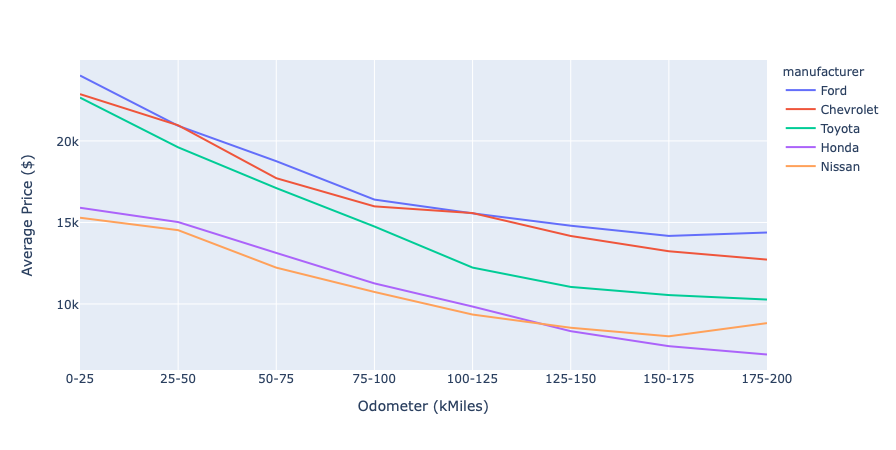

0

In [10]:
import plot
plot.odometer()

# Used Car Recommendation System

### Please Enter the range of price:

In [8]:
lower_bound = widgets.FloatText(
    value=0,
    description='From:',
    disabled=False
)
display(lower_bound)

FloatText(value=0.0, description='From:')

In [9]:
upper_bound = widgets.FloatText(
    value=0,
    description='To:',
    disabled=False
)
display(upper_bound)

FloatText(value=0.0, description='To:')

### Filters

In [10]:
state = [ 'None', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NC', 'NE', 'NV', 'NJ', 'NM', 'NY',
       'NH', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_selector = widgets.Dropdown(
    options=state,
    value='None',
    description='STATE:',
    disabled=False,
)
display(state_selector)

Dropdown(description='STATE:', options=('None', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'G…

In [11]:
fuel = ['None', 'Gas', 'Diesel', 'Hybrid', 'Electric', 'Other']
fuel_selector = widgets.Dropdown(
    options=fuel,
    value='None',
    description='FUEL:',
    disabled=False,
)
display(fuel_selector)

Dropdown(description='FUEL:', options=('None', 'Gas', 'Diesel', 'Hybrid', 'Electric', 'Other'), value='None')

In [50]:
type_list = ['None','Sedan', 'SUV', 'Pickup', 'Coupe', 'Van', 'Truck',
       'Mini-van', 'Wagon', 'Convertible', 'Hatchback', 'Bus', 'Offroad', 'Other']
type_selector = widgets.Dropdown(
    options=type_list,
    value='None',
    description='Type:',
    disabled=False,
)
display(type_selector)

Dropdown(description='Type:', options=('None', 'Sedan', 'SUV', 'Pickup', 'Coupe', 'Van', 'Truck', 'Mini-van', …

In [13]:
color = ['None','Blue', 'Red', 'Silver', 'Black', 'White', 'Grey', 'Orange',
       'Green', 'Yellow', 'Custom', 'Brown', 'Purple']
color_selector = widgets.Dropdown(
    options=color,
    value='None',
    description='COLOR:',
    disabled=False,
)
display(color_selector)

Dropdown(description='COLOR:', options=('None', 'Blue', 'Red', 'Silver', 'Black', 'White', 'Grey', 'Orange', '…

In [14]:
cylinders = ['None', 8, 4, 6, 10, 5, 3, 12]
cylinders_selector = widgets.Dropdown(
    options=cylinders,
    value='None',
    description='Cylinders:',
    disabled=False,
)
display(cylinders_selector)

Dropdown(description='Cylinders:', options=('None', 8, 4, 6, 10, 5, 3, 12), value='None')

In [15]:
transmission = ['None','Automatic', 'Manual', 'Other']
transmission_selector = widgets.Dropdown(
    options=transmission,
    value='None',
    description='Transmission:',
    disabled=False,
)
display(transmission_selector)

Dropdown(description='Transmission:', options=('None', 'Automatic', 'Manual', 'Other'), value='None')

In [16]:
year_selector = widgets.IntRangeSlider(
    value=[2010, 2015],
    min=1900,
    max=2021,
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(year_selector)

IntRangeSlider(value=(2010, 2015), continuous_update=False, description='Year:', max=2021, min=1900)

In [98]:
update_df = preference_selection(df, State=state_selector.value, Fuel=fuel_selector.value, Type=type_selector.value, color=color_selector.value, Cylinder=cylinders_selector.value, Transmission=transmission_selector.value, year_min=year_selector.value[0], year_max=year_selector.value[1])

Thank you for your input. Your selection is: 
state: CA, 
Fuel: Gas, 
Type: None, 
Color: Red, 
Cylinder: None, 
Transmission: None, 
Year range: 1900-2021


In [100]:
update_df = cars_in_price_range(update_df, lower_bound.value, upper_bound.value, num_of_sel=15)

In [101]:
HTML(update_df.to_html(escape=False,formatters=dict(image_url=path_to_image_html)))

,condition,odometer,title_status,manufacturer,model,price,year,image_url,score
30625,excellent,0.0,clean,chrysler,pacifica,14900,2017.0,,96.802324
30644,excellent,0.0,clean,mazda,cx-5,12900,2016.0,,96.074155
37731,like new,16672.0,clean,honda,civic si,23995,2019.0,,94.472542
51075,excellent,26463.0,clean,alfa-romeo,romeo giulia ti awd,27000,2017.0,,91.245094
40248,good,27216.0,lien,mazda,cx5 grand touring,23000,2018.0,,91.185133
